In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
import lightgbm as lgb

from sklearn import metrics 
from sklearn.metrics import classification_report

In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

In [2]:
DATADIR = "data"
CATEGORIES = ["Rotating", "Not_Rotating"]
dataset = []
img_size = (256, 256)
for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
				new_array = cv2.resize(img_array, img_size)
				dataset.append([new_array, class_num])
			except Exception as e:
				pass

In [3]:
X = [] #features
Y = [] #labels

for features, label in dataset:
	X.append(features)
	Y.append(label)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)

X_train = np.array(X_train).reshape(-1, img_size[0]*img_size[1]*3)
Y_train = np.array(Y_train).reshape(-1,)
X_train = (X_train)/255

X_test = np.array(X_test).reshape(-1, img_size[0]*img_size[1]*3)
Y_test = np.array(Y_test).reshape(-1,)
X_test = (X_test)/255

In [5]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

test accuracy = 93.0 %

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.93      0.95      0.94        55

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



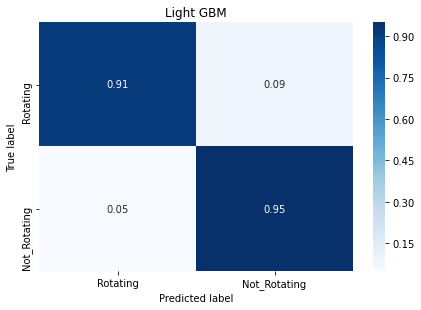

In [7]:
Y_te = clf.predict(X_test)
acc = metrics.accuracy_score(Y_test, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["Rotating", "Not_Rotating"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Light GBM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()